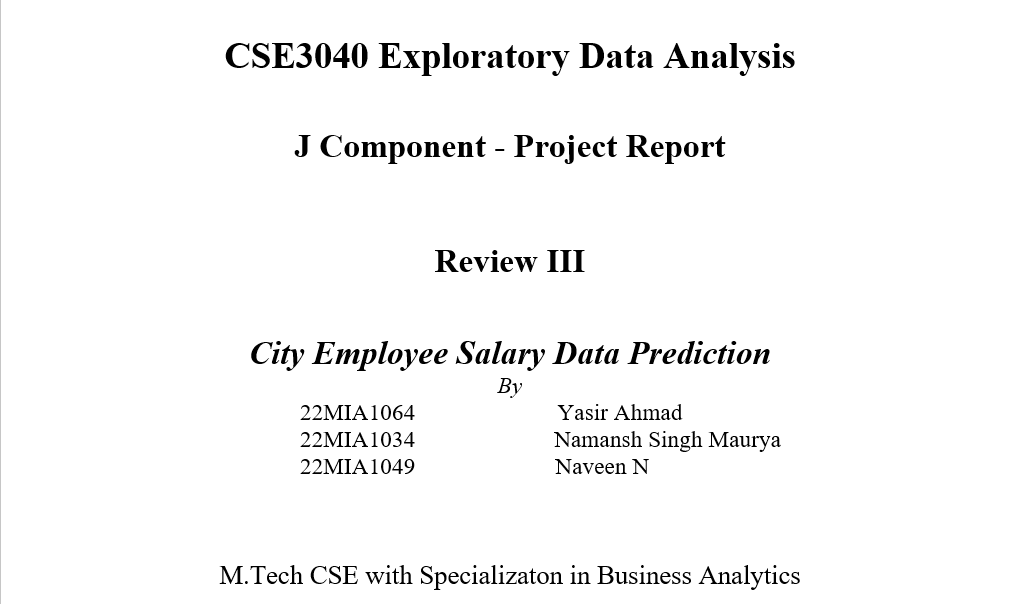
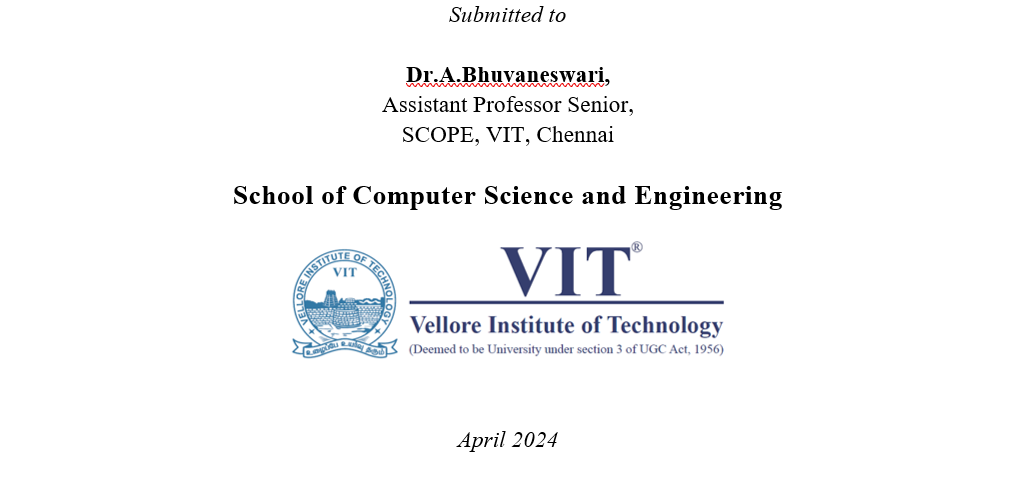

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#pd.set_option('future.no_silent_downcasting', True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-dataset-from-glassdoor/salary_data_cleaned.csv
/kaggle/input/jobs-dataset-from-glassdoor/glassdoor_jobs.csv
/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv


# Importing Libraries  
Importing required libraries for the project

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

 # Reading Data  
Reading the data into a pandas dataframe.

In [3]:
df = pd.read_csv("/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


 # Basic Info  
 Basic Information about the shape, colummns, datatype, etc in dataset.

In [4]:
df = df.drop('Unnamed: 0', axis=1)
print(f"Shape: {df.shape}\n")
print(f"{df.columns}\n")
df.info()

Shape: (742, 32)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headq

 # Summary

In [5]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


# Cleaning Data  
Cleaning the dataset by removing null or unknown values.

In [6]:
df.replace("na",np.nan,inplace=True)
df.replace("NaN",np.nan,inplace=True)

In [7]:
df.isnull().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_txt            0
job_state              0
same_state             0
age                    0
python_yn              0
R_yn                   0
spark                  0
aws                    0
excel                  0
job_simp             184
seniority            520
desc_len               0
num_comp               0
dtype: int64

# Imputation  
Imputation of null values.

## Imputation by observation

In [8]:
print(df['seniority'].unique())
print(df['seniority'].value_counts())
df['seniority'] = df['seniority'].fillna("senior")

[nan 'senior' 'jr']
seniority
senior    220
jr          2
Name: count, dtype: int64


In [9]:
df['seniority'].value_counts()

seniority
senior    740
jr          2
Name: count, dtype: int64

## Imputation using mode

In [10]:
print(df['job_simp'].unique())
print(df['job_simp'].value_counts())
df['job_simp'] = df['job_simp'].fillna(df['job_simp'].mode()[0])

['data scientist' nan 'analyst' 'data engineer' 'director' 'manager' 'mle']
job_simp
data scientist    279
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64


In [11]:
print(df['job_simp'].value_counts())

job_simp
data scientist    463
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64


In [12]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

# Removing unknowns
Some unknowns are still there. Size, Headquaters, etc have value of -1 which is not possible.

In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


Min value is -1, which needs to be imputed

In [14]:
#columns_with_min_minus_one = [col for col in df.columns if df[col].min() in (-1,'-1')]
columns_with_min_minus_one = ['Rating', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Competitors', 'age']
print("Columns where the minimum value is -1:")
print(columns_with_min_minus_one)

Columns where the minimum value is -1:
['Rating', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Competitors', 'age']


In [15]:
print(df["Industry"].mode()[0])
df["Industry"][df["Industry"] == "-1"] = df.Industry.mode()[0]

Biotech & Pharmaceuticals


/tmp/ipykernel_18/2277273944.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Industry"][df["Industry"] == "-1"] = df.Industry.mode()[0]
/tmp/ipykernel_18/2277273944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [16]:
print(df["Type of ownership"].value_counts())
df["Type of ownership"][(df["Type of ownership"] =="-1") | (df["Type of ownership"] =='Unknown')] = "Company - Private"

Type of ownership
Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: count, dtype: int64


/tmp/ipykernel_18/3783619838.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Type of ownership"][(df["Type of ownership"] =="-1") | (df["Type of ownership"] =='Unknown')] = "Company - Private"
/tmp/ipykernel_18/3783619838.py:2: Setti

In [17]:
df["Size"].value_counts()

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: count, dtype: int64

In [18]:
df["Size"][(df["Size"] == "-1")| (df["Size"] == "Unknown")] = df["Size"].mode()[0]
df["Size"].value_counts()

/tmp/ipykernel_18/3875089315.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Size"][(df["Size"] == "-1")| (df["Size"] == "Unknown")] = df["Size"].mode()[0]
/tmp/ipykernel_18/3875089315.py:1: SettingWithCopyWarning: 
A value is trying

Size
1001 to 5000 employees     160
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Name: count, dtype: int64

In [19]:
df["Revenue"].value_counts()

Revenue
Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: count, dtype: int64

In [20]:
df.Revenue[df.Revenue == "-1"] = 'Unknown / Non-Applicable'
print(df['Revenue'].value_counts())

Revenue
Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: count, dtype: int64


/tmp/ipykernel_18/2543874012.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Revenue[df.Revenue == "-1"] = 'Unknown / Non-Applicable'
/tmp/ipykernel_18/2543874012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [21]:
df.replace(-1,np.nan,inplace=True)
df.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating               11
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              50
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
hourly                0
employer_provided     0
min_salary            0
max_salary            0
avg_salary            0
company_txt           0
job_state             0
same_state            0
age                  50
python_yn             0
R_yn                  0
spark                 0
aws                   0
excel                 0
job_simp              0
seniority             0
desc_len              0
num_comp              0
dtype: int64

## Imputation using Median

In [22]:
#imputation numerical columns
impute = SimpleImputer(strategy="median")
df["Rating"] = impute.fit_transform(df["Rating"].values.reshape(-1,1))
df["age"] = impute.fit_transform(df["age"].values.reshape(-1,1))
df["Founded"] = impute.fit_transform(df["Founded"].values.reshape(-1,1))

In [23]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.688544,1971.454178,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.545822,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.566106,52.524552,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,52.524552,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1961.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


# Scaling and Normalisation
Normalising the data for better detection of outliers and enhanced performace of the ML model.

In [24]:
df_num = df.select_dtypes(include="number")
ss = StandardScaler()

df_num_st = pd.DataFrame(ss.fit_transform(df_num))
df_num_st.columns = ss.get_feature_names_out(df_num.columns)
df_num = df_num_st

# Kurtosis and Skewness of the data

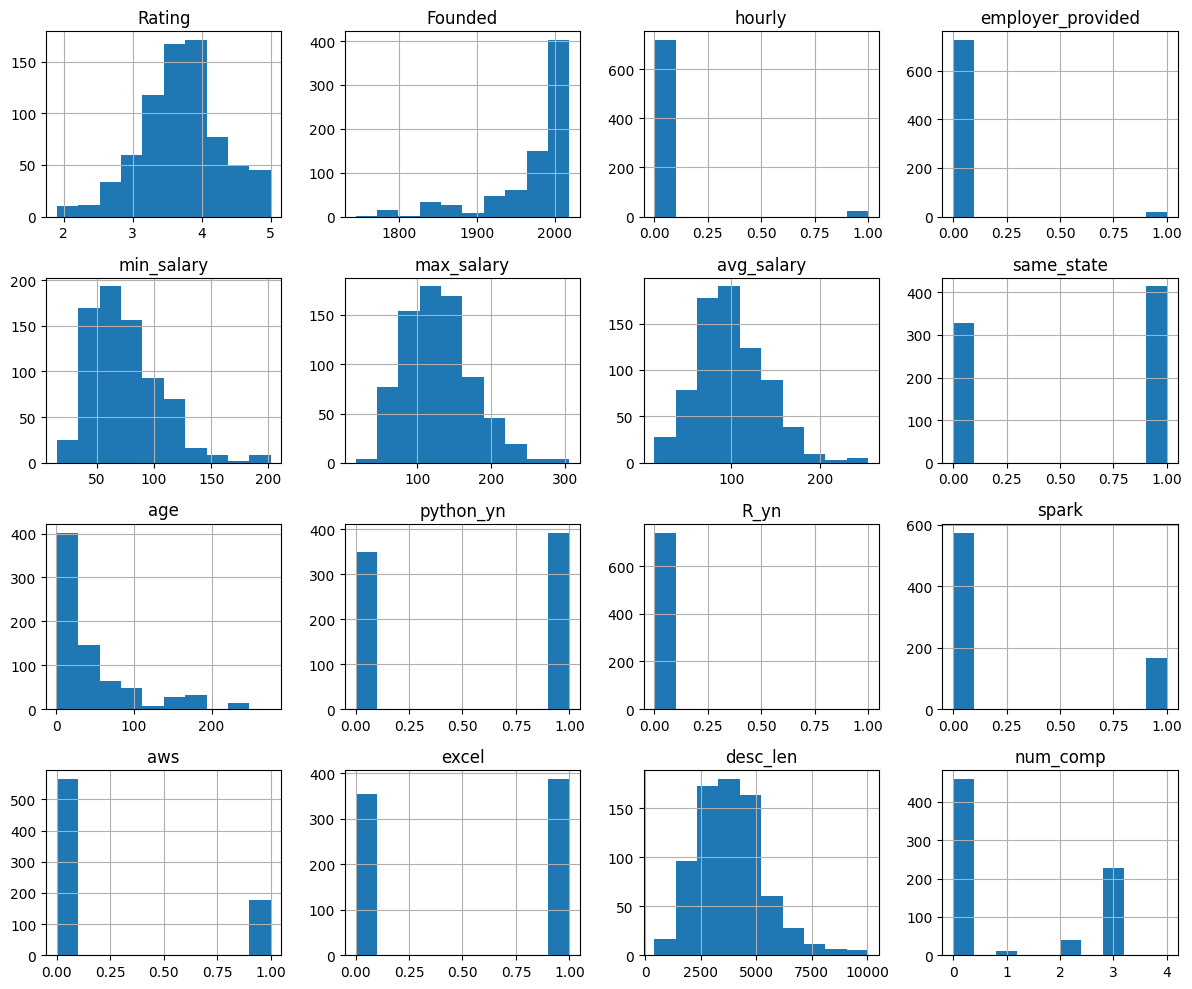

Column: Rating
Skewness: -0.2650567207822845
Kurtosis: 0.18597079437214115

Column: Founded
Skewness: -1.8530511869290667
Kurtosis: 3.0351903582840642

Column: hourly
Skewness: 5.297499987719976
Kurtosis: 26.13394099048334

Column: employer_provided
Skewness: 6.390268857764117
Kurtosis: 38.94049007088155

Column: min_salary
Skewness: 1.1092336755520011
Kurtosis: 1.954967771243124

Column: max_salary
Skewness: 0.6244715389442066
Kurtosis: 0.6052151151265996

Column: avg_salary
Skewness: 0.6094736592509535
Kurtosis: 0.8891961858304702

Column: same_state
Skewness: -0.23385178848989452
Kurtosis: -1.9505782585917066

Column: age
Skewness: 1.853051186929067
Kurtosis: 3.035190358284066

Column: python_yn
Skewness: -0.11361915933248869
Kurtosis: -1.992468516360939

Column: R_yn
Skewness: 19.222277430318123
Kurtosis: 368.48917823228595

Column: spark
Skewness: 1.31931148181632
Kurtosis: -0.2601256388809161

Column: aws
Skewness: 1.2381674833553906
Kurtosis: -0.4682105860031398

Column: excel
S

In [25]:
import matplotlib.pyplot as plt

# Plot histograms for each column
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for each column
skewness = df_num.skew()
kurtosis = df_num.kurtosis()

# Print skewness and kurtosis for each column
for col in df_num.columns:
    print(f"Column: {col}")
    print(f"Skewness: {skewness[col]}")
    print(f"Kurtosis: {kurtosis[col]}")
    print()

# Box Plot
Box plot for outlier detection.

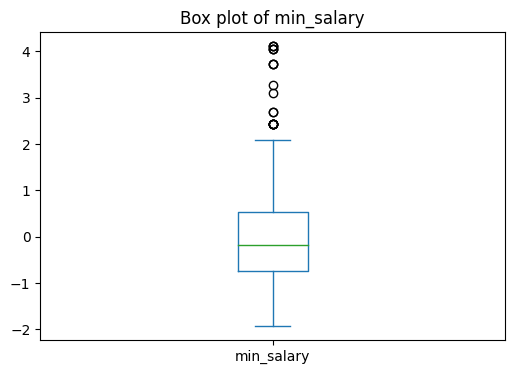

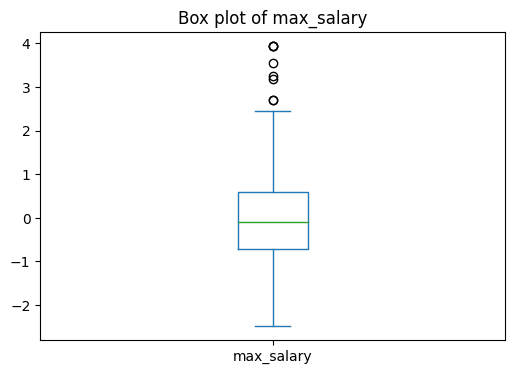

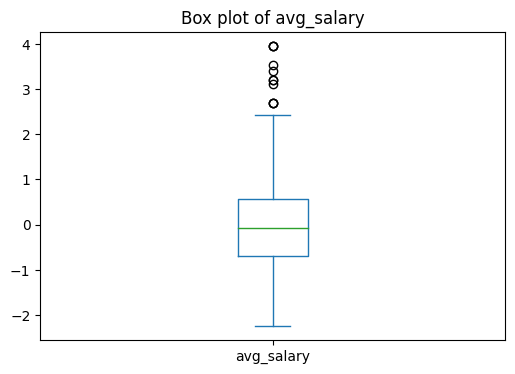

In [26]:
for col in ["min_salary","max_salary","avg_salary"]:
    plt.figure(figsize=(6, 4))
    df_num[col].plot(kind='box')
    plt.title(f'Box plot of {col}')
    plt.show()


# Outlier Detection and Removal

In [27]:
import pandas as pd

def detect_outliers(df, threshold=1.5):
    outliers = pd.DataFrame()
    for col in ["min_salary","max_salary","avg_salary"]:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers = pd.concat([outliers, col_outliers])
    return outliers

outliers_df = detect_outliers(df_num)
outliers_df

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
45,2.318188,0.391430,-0.182828,6.530472,2.431558,0.704813,1.400318,-1.123475,-0.391430,-1.058301,-0.051988,-0.538920,1.793296,0.955181,-0.431804,-0.761876
46,0.020249,-0.256323,-0.182828,-0.153128,2.689958,1.833386,2.160044,-1.123475,0.256323,0.944911,-0.051988,-0.538920,-0.557633,0.955181,2.246972,1.406841
103,0.904072,-0.694509,-0.182828,-0.153128,4.046560,3.249633,3.524977,0.890096,0.694509,0.944911,-0.051988,-0.538920,-0.557633,0.955181,-0.373928,1.406841
176,0.020249,0.867719,-0.182828,6.530472,4.046560,2.696411,3.203059,-1.123475,-0.867719,0.944911,-0.051988,-0.538920,1.793296,0.955181,-1.471614,-0.761876
195,0.727308,0.734358,-0.182828,-0.153128,3.723560,2.032545,2.687990,0.890096,-0.734358,0.944911,-0.051988,1.855563,1.793296,-1.046922,0.110133,1.406841
266,0.020249,0.867719,-0.182828,6.530472,4.046560,2.696411,3.203059,-1.123475,-0.867719,0.944911,-0.051988,-0.538920,1.793296,0.955181,-1.471614,-0.761876
330,0.727308,0.734358,-0.182828,-0.153128,3.723560,2.032545,2.687990,0.890096,-0.734358,0.944911,-0.051988,1.855563,1.793296,-1.046922,0.110133,1.406841
354,-0.686809,-1.132695,-0.182828,-0.153128,4.111160,3.935628,3.949909,-1.123475,1.132695,0.944911,-0.051988,-0.538920,-0.557633,-1.046922,0.395571,1.406841
373,2.318188,0.391430,-0.182828,6.530472,2.431558,0.704813,1.400318,-1.123475,-0.391430,-1.058301,-0.051988,-0.538920,1.793296,0.955181,-0.431804,-0.761876
410,-0.686809,-1.132695,-0.182828,-0.153128,2.431558,2.452994,2.417579,-1.123475,1.132695,0.944911,-0.051988,-0.538920,-0.557633,-1.046922,0.043049,1.406841


In [28]:
import pandas as pd

def remove_outliers(df, threshold=1.5):
    clean_df = df.copy()
    for col in ["Rating","Founded","min_salary","max_salary","avg_salary"]:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

cleaned_df = remove_outliers(df_num)
cleaned_df

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
0,0.197014,0.029450,-0.182828,-0.153128,-0.701547,-0.822078,-0.737218,-1.123475,-0.029450,0.944911,-0.051988,-0.538920,-0.557633,0.955181,-0.877061,-0.761876
1,-0.510044,0.239017,-0.182828,-0.153128,-0.378546,-0.357372,-0.338040,-1.123475,-0.239017,0.944911,-0.051988,-0.538920,-0.557633,-1.046922,0.600771,-0.761876
2,1.964659,0.734358,-0.182828,-0.153128,0.170555,-0.844207,-0.402424,0.890096,-0.734358,0.944911,-0.051988,1.855563,-0.557633,0.955181,-0.268697,-0.761876
3,0.197014,-0.122962,-0.182828,-0.153128,-0.604646,-0.689305,-0.621328,0.890096,0.122962,0.944911,-0.051988,-0.538920,-0.557633,-1.046922,0.008849,1.406841
4,-1.393867,0.505739,-0.182828,-0.153128,0.364355,0.328623,0.357303,0.890096,-0.505739,0.944911,-0.051988,-0.538920,-0.557633,0.955181,-0.750785,1.406841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,-0.156515,0.867719,-0.182828,-0.153128,0.364355,0.195849,0.280043,-1.123475,-0.867719,-1.058301,-0.051988,-0.538920,-0.557633,-1.046922,0.759932,1.406841
738,1.257601,0.658152,-0.182828,-0.153128,-0.087846,0.107334,0.048262,-1.123475,-0.658152,0.944911,-0.051988,1.855563,1.793296,-1.046922,1.486681,1.406841
739,-1.924161,0.239017,-0.182828,-0.153128,-0.604646,-0.822078,-0.698588,0.890096,-0.239017,-1.058301,-0.051988,-0.538920,-0.557633,0.955181,-0.520593,-0.761876
740,-0.863573,0.391430,-0.182828,-0.153128,0.655055,0.704813,0.692098,-1.123475,-0.391430,-1.058301,-0.051988,-0.538920,-0.557633,0.955181,-1.465037,-0.761876


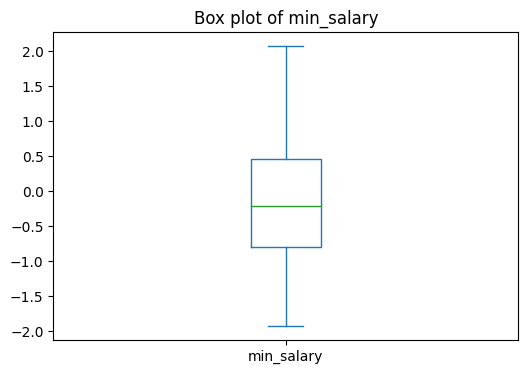

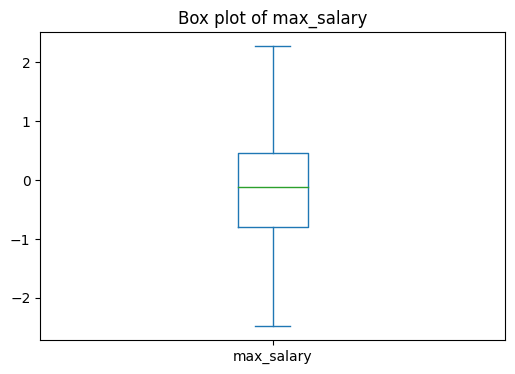

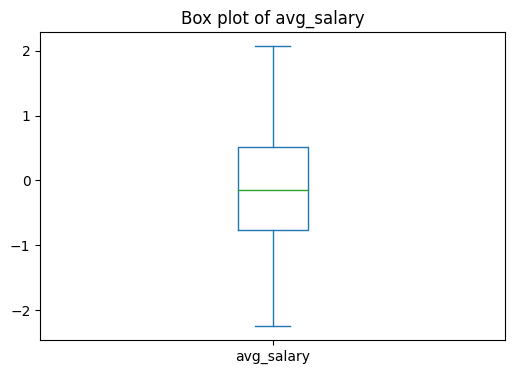

In [29]:
for col in ["min_salary","max_salary","avg_salary"]:
    plt.figure(figsize=(6, 4))
    cleaned_df[col].plot(kind='box')
    plt.title(f'Box plot of {col}')
    plt.show()


# Visualisations
## Types of Jobs

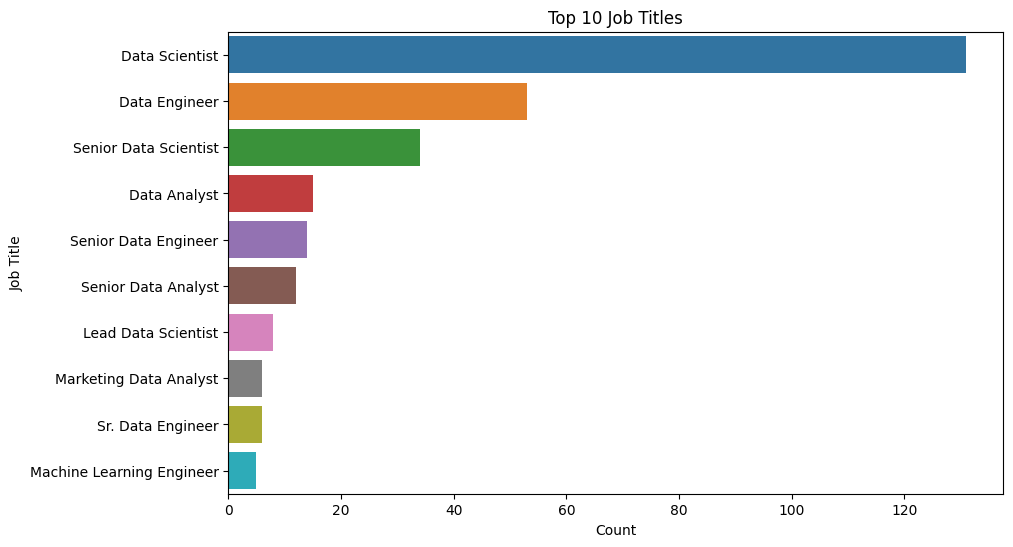

In [30]:
job_title_counts = df['Job Title'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=job_title_counts.head(10), y=job_title_counts.head(10).index, orient='h')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

## Top 10 Industries by Job Listings 

In [31]:
import pandas as pd
import plotly.express as px

industry_counts = df['Industry'].value_counts().head(10)

# Create a DataFrame for the top 10 industries and their counts, sorted in descending order
top_industries_df = pd.DataFrame({'Industry': industry_counts.index, 'Count': industry_counts.values})
top_industries_df = top_industries_df.sort_values(by='Count', ascending=True)

# Create an interactive bar plot using Plotly Express
fig = px.bar(top_industries_df, x='Count', y='Industry', orientation='h',
             title='Top 10 Industries by Job Listings (Descending Order)')
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Industry')
fig.show()

## Top 10 region have the highest average salary

/tmp/ipykernel_18/992096015.py:2: FutureWarning:

The provided callable <function mean at 0x7c4fcc1f04c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



<Axes: title={'center': 'Top 10 region have the highest average salary'}, xlabel='Location', ylabel='avg_salary'>

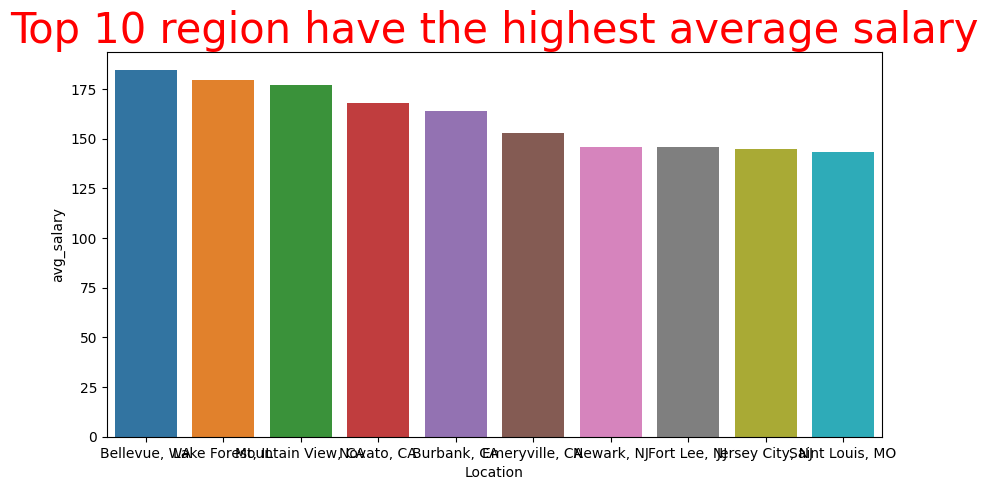

In [32]:
plt.figure(figsize = (10,5))
city = pd.pivot_table(df, index = 'Location', values = 'avg_salary', aggfunc = np.mean).reset_index()
city = city.sort_values('avg_salary', ascending = False)
city_10 = city.head(10)
plt.title('Top 10 region have the highest average salary', size = 30, color = 'red')
sns.barplot(city_10, x = 'Location', y = 'avg_salary')

## Create a histogram of company ratings

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



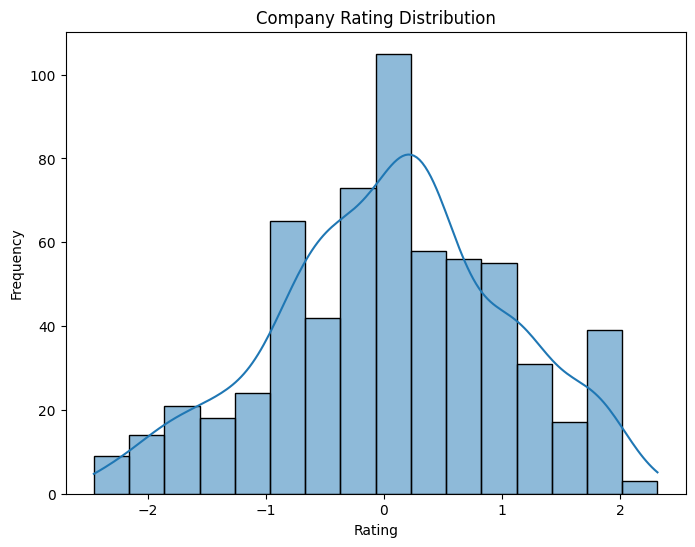

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['Rating'], bins=16, kde=True)
plt.title('Company Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Ranking Age of Company

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: title={'center': 'Kind of companies'}, xlabel='Kind of Company', ylabel='Count'>

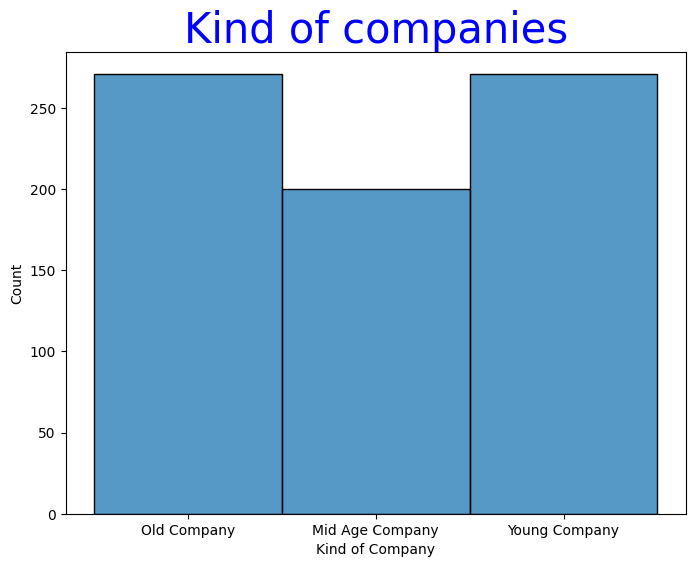

In [34]:
df_job = df
type_com = []
for i in df_job['Founded']:
    if i==-1:
        type_com.append('No info')
    elif i<=1980:
        type_com.append('Old Company')
    elif 1980<i<2000:
        type_com.append('Mid Age Company')
    elif 2000<=i<2020:
        type_com.append('Young Company')
    else:
        type_com.append('New Company')
df_job['Kind of Company'] = type_com

plt.figure(figsize =(8,6))
plt.title('Kind of companies', size = 30, color = 'blue')
sns.histplot(df_job['Kind of Company'])

## Ranking scale of company

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: title={'center': 'Size of companies'}, xlabel='Size_com', ylabel='Count'>

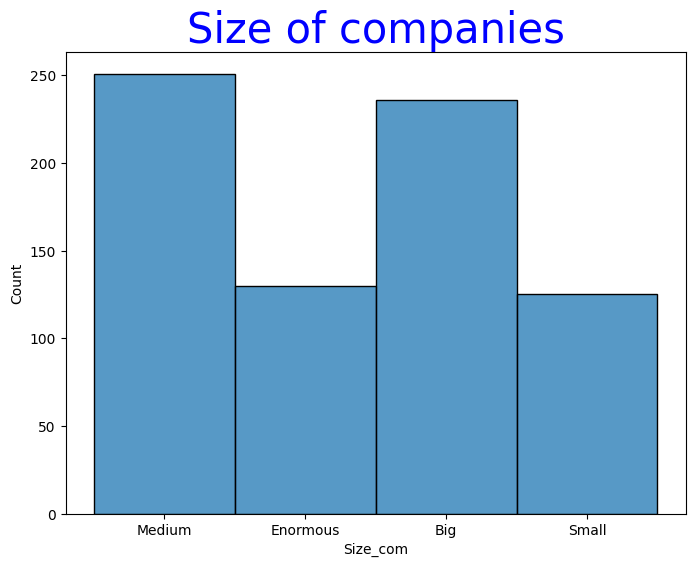

In [35]:
size_com = []
for i in df_job['Size']:
    if i ==-1 or i =='Unknow':
        size_com.append('No Info')
    elif i=='1 to 50 employees'or i=='51 to 200 employees':
        size_com.append('Small')
    elif i =='201 to 500 employees' or i =='501 to 1000 employees':
        size_com.append('Medium')
    elif i=='1001 to 5000 employees' or i =='5001 to 10000 employees':
        size_com.append('Big')
    else:
        size_com.append('Enormous')
df_job['Size_com'] = size_com

plt.figure(figsize =(8,6))
plt.title('Size of companies', size = 30, color ='blue')
sns.histplot(df_job['Size_com'])

## Average slary by size of companies

/tmp/ipykernel_18/2040589292.py:1: FutureWarning:

The provided callable <function mean at 0x7c4fcc1f04c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



<Axes: title={'center': 'Average slary by size of companies'}, xlabel='Size_com', ylabel='avg_salary'>

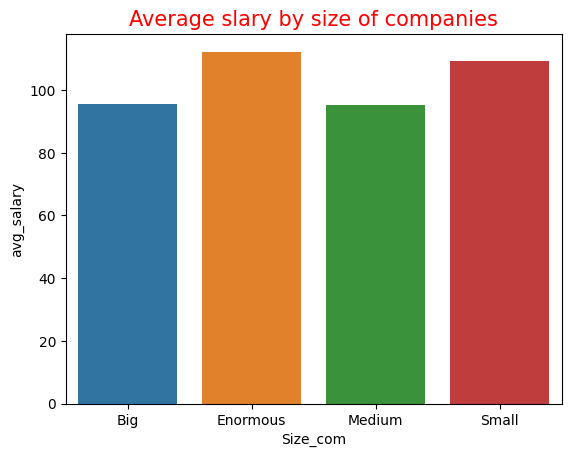

In [36]:
high_com_salary = pd.pivot_table(df_job,index = 'Size_com', values = 'avg_salary', aggfunc = np.mean).reset_index()
plt.title('Average slary by size of companies', size = 15, color = 'red')
sns.barplot(high_com_salary,x = 'Size_com', y='avg_salary')

## Pie chart of high salary jobs


In [37]:
salary = pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/salary_data_cleaned.csv')
high_salary_100 = salary['avg_salary'].sort_values(ascending=False).head(100)
high_salary_100
# avg_salary to 100th in high ranking 254.0 ~ 142.5
high_salary_100_data = salary.loc[high_salary_100.index]
high_salary_100_data['salary_grade'] = 'high'

low_salary_100 = salary['avg_salary'].sort_values().head(100)
low_salary_100
# avg_salary to 100th in low ranking 13.5 ~ 61.0
# select and labeling for low_salary data 

low_salary_100_data = salary.loc[low_salary_100.index]
low_salary_100_data['salary_grade'] = 'low'

In [38]:
import plotly.express as ex
ex.pie(high_salary_100_data, names='Job Title',title='high salary Job',hole=0.3, width=1000, height=800)

## Pie chart of low salary jobs

In [39]:
ex.pie(low_salary_100_data, names='Job Title',title='low salary Job',hole=0.3, width=1000, height=800)

# Feature Selection
## Compute the correlation matrix

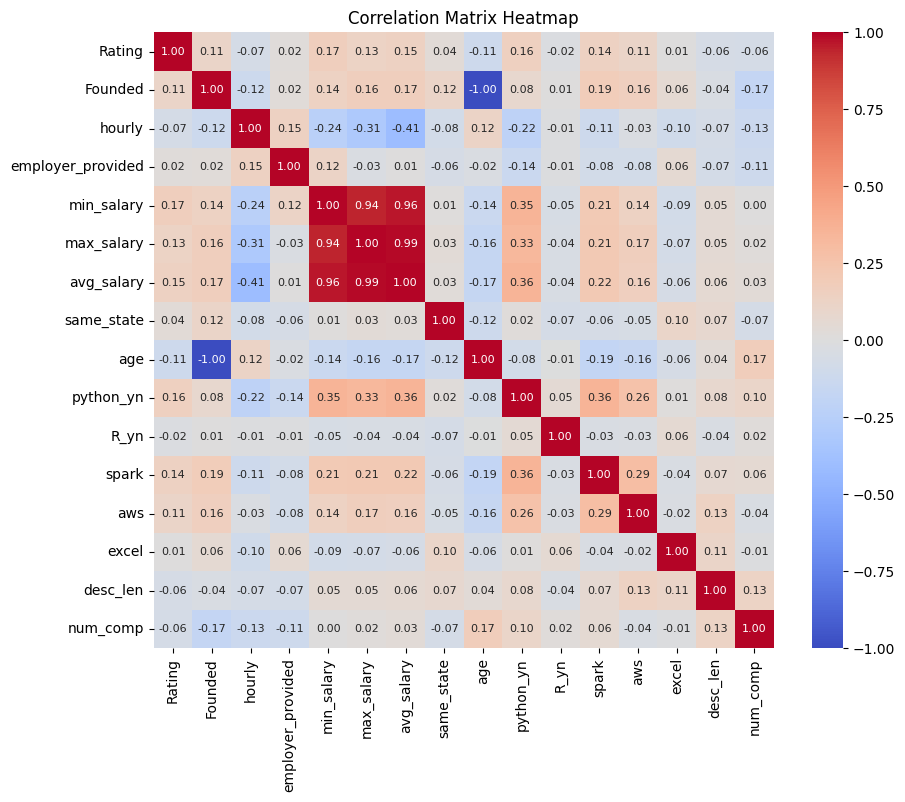

Rating               0.146544
Founded              0.167356
hourly              -0.407082
employer_provided    0.007082
min_salary           0.963829
max_salary           0.985795
avg_salary           1.000000
same_state           0.030758
age                 -0.167356
python_yn            0.357850
R_yn                -0.041793
spark                0.217945
aws                  0.157152
excel               -0.060328
desc_len             0.061059
num_comp             0.031867
Name: avg_salary, dtype: float64

In [40]:
correlation_matrix = cleaned_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = '.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')
plt.show()
correlation_matrix['avg_salary']

# Selecting Threshold.
Correlation threshold is used to filter unrelated columns

In [41]:
correlation_threshold = 0.15

# Selecting Columns
On the basis of the threshold `0.15`, filter out columns whose correlation is `<0.15 && >-0.15`

In [42]:
# Get columns with correlation higher than 0.15 with respect to the column 'actual'
high_corr_columns = correlation_matrix[abs(correlation_matrix['avg_salary']) > correlation_threshold]['avg_salary'].index.tolist()

# Remove 'actual' itself from the list if it's included
high_corr_columns.remove('avg_salary')

print("Columns with correlation higher than threshold with respect to 'avg salary':")
print(high_corr_columns)

Columns with correlation higher than threshold with respect to 'avg salary':
['Founded', 'hourly', 'min_salary', 'max_salary', 'age', 'python_yn', 'spark', 'aws']


# Extracting Targets and Features
Seperating the target variable (dependent variable) from the features (independent variables)

In [43]:
from sklearn.model_selection import train_test_split
X = cleaned_df[high_corr_columns]
Y=cleaned_df['avg_salary']

# Split Testing and Training Data
Split the data for training and testing.

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)

(504, 8)
(126, 8)
(504,)


# Model Creation
Creating a Linear Regression model using scikit learn module.

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model Training
Training the model using `x_train` and `y_train`

In [46]:
model.fit(x_train,y_train)

LinearRegression()

# Predict
Getting predictions from the model


In [47]:
prediction = model.predict(x_test)

# Coefficients of Features
Weights of respective model and the intrecept point of the model

In [48]:
print(model.coef_)
print(model.intercept_)

[ 1.60077790e-03 -1.16977687e-01  4.01668211e-01  5.76643416e-01
 -1.60077790e-03  1.42161464e-04 -3.52433114e-04  1.83265569e-03]
-0.0014742674316616383


# Comparison
Actual vs Predicted

In [49]:
AcPr_data = pd.DataFrame({'Actual': y_test, 'predicted': prediction,'range':[i for i in range(len(y_test.index))]})
AcPr_data

,Actual,predicted,range
464,-1.329548,-1.329332,0
151,0.151275,0.152107,1
455,-0.518314,-0.510959,2
87,0.344426,0.347813,3
557,-0.698588,-0.697218,4
...,...,...,...
197,-2.037767,-2.137203,121
650,1.001139,0.999390,122
175,-0.054752,-0.055688,123
732,0.267166,0.270935,124


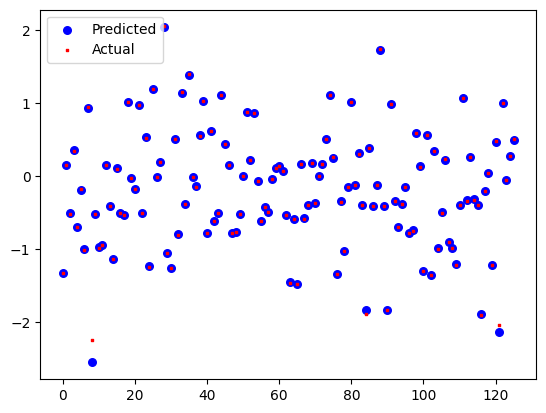

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(x=AcPr_data['range'],y=AcPr_data['predicted'], s=30, c='b', marker="o", label='Predicted')
ax.scatter(x=AcPr_data['range'], y=AcPr_data['Actual'], s=4, c='r', marker="s", label='Actual',)
plt.legend(loc='upper left')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0008641141532591181


# Accuracy Test
Testing the accuracy of the model

In [52]:
def accuracy_within_tolerance(test, pred, tolerance):
    """
    Calculates the percentage of predictions within a specified tolerance of the true values.
    
    Parameters:
        test (array-like): Array of true target values.
        pred (array-like): Array of predicted values.
        tolerance (float): Tolerance value.
        
    Returns:
        accuracy (float): Percentage of predictions within the tolerance.
    """
    # Calculate absolute errors
    errors = abs(test - pred)
    
    # Count number of predictions within tolerance
    within_tolerance = sum(errors <= tolerance)
    
    # Calculate accuracy
    accuracy = within_tolerance / len(test)
    
    return accuracy*100

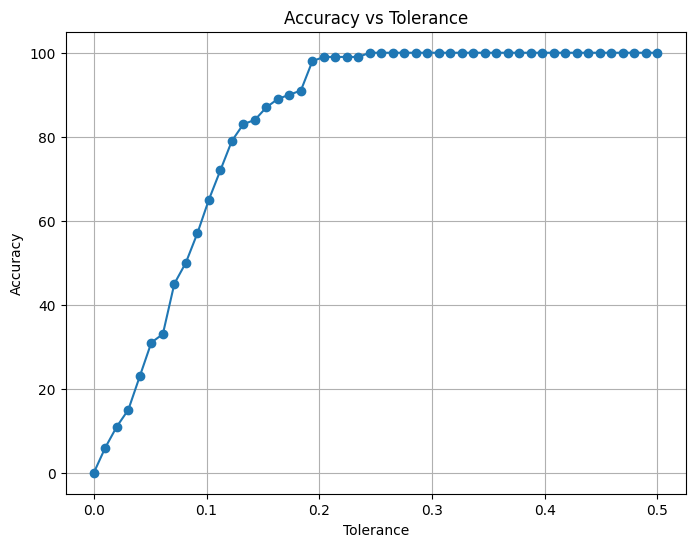

In [53]:
np.random.seed(0)
test_values = np.random.rand(100)
pred_values = test_values + np.random.normal(0, 0.1, 100)
tolerance_values = np.linspace(0, 0.5, 50)  # Tolerance values from 0 to 0.5

# Calculate accuracy for each tolerance level
accuracy_values = [accuracy_within_tolerance(test_values, pred_values, tol) for tol in tolerance_values]

# Plot accuracy vs tolerance
plt.figure(figsize=(8, 6))
plt.plot(tolerance_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs Tolerance')
plt.xlabel('Tolerance')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [54]:
accuracy_within_tolerance(y_test, prediction, 0.05)

98.4126984126984

# Result
1. The final model has an accuracy of 98.41% with a tolerance of +/-0.05 units